## Visualizing Two Quantitative Variables with Seaborn

### Introduction of Seaborn

Seborn library는 visualization을 간편하게 해준다. 또한 pandas data structure을 갖고 용이하게 작업을 할 수 있으며, matplotlib에 기반을 두고 있다.  

In [33]:
import seaborn as sns

다음과 같이 불러 올 수 있다.  pandas data frame을 다루기 전에 list를 갖고 plot들을 만들어 보도록 하자.  

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
countries = pd.read_csv("countries-of-the-world.csv")
young_survey = pd.read_csv("young-people-survey-responses.csv")
student = pd.read_csv("student.csv")
mpg= pd.read_csv("mpg.csv")

gdp=countries["GDP ($ per capita)"]
phones=countries["Phones (per 1000)"]
region=countries["Region"]


gdp_list = gdp.values.tolist()
phones_list = phones.values.tolist()
region_list = region.values.tolist()

plt.style.use("ggplot")


`gdp`와 `phones`의 관계를 scatter point를 통해 살펴보도록 하자.  

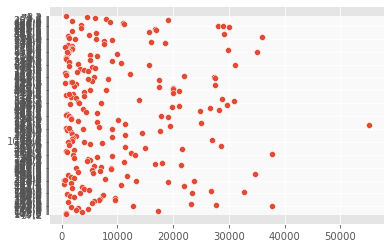

In [35]:
sns.scatterplot(x=gdp_list, y=phones_list)

plt.show()

이번에는 list를 가지고 countplot를 만들어보자. 이 `countries`는 227개 국가에 대한 정보를 가지고 있다. 우리가 알아볼 것은 얼마나 많은 나라가 어떤 region에 얼만큼 속해있는지 이다.

<function matplotlib.pyplot.show(close=None, block=None)>

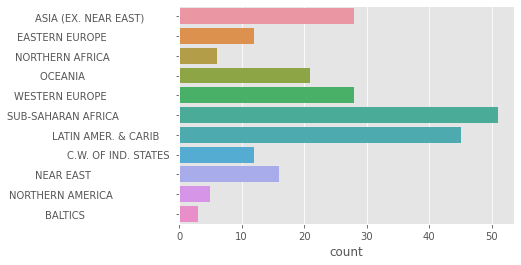

In [36]:
sns.countplot(y=region_list)
plt.show

이제는 pandas dataframe을 가지고 plot를 만들어 볼 것이다.  `young_survey`은 학생들의 선호에 대한 정보를 가지고 있는데 예를 들어 `Spiders`는 거미에 대한 선호를 나타낸다. 5는 극도로 싫어하는 거고 1은 극도로 좋아하는 거다.  

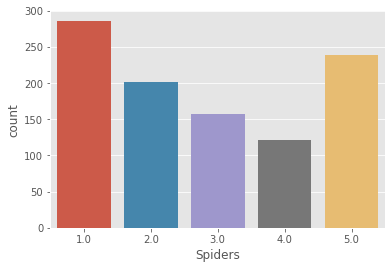

In [37]:
sns.countplot(x='Spiders', data=young_survey)
plt.show()

색칠을 통해 제 3의 정보를 추가할 수 있다. 이번에 그릴 plot은 scatter plot으로  `young_survey`를 사용할 것이다. x 축을 결석의 수(`"absences"`)로 y 축을 최종 성적(`"G3"`)으로 그린 다음, `location`으로 색칠 해보자.  

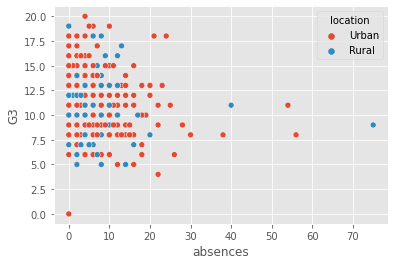

In [38]:
sns.scatterplot(x= "absences", y= "G3",data=student, hue= "location")
plt.show()

hue의 order를 바꿀 수도 있다.  

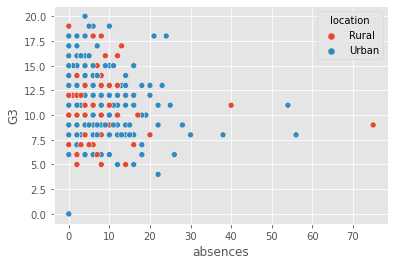

In [39]:
sns.scatterplot(x="absences", y="G3", 
                data=student, 
                hue="location",hue_order=["Rural","Urban"])
plt.show()

색깔을 직접 지정할 수도 있다.  

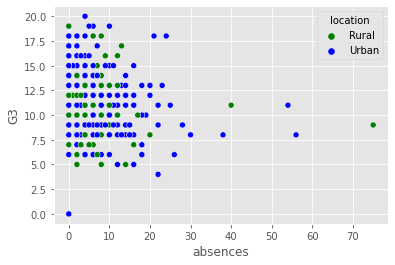

In [40]:
palette_colors = {"Rural": "green", "Urban": "blue"}

sns.scatterplot(x="absences", y="G3", 
                data=student, 
                hue="location",hue_order=["Rural","Urban"],
                palette=palette_colors)
plt.show()

결석이 많은 학생일 수록 final grade(G3)이 낮은 경향이 있는 것을 알 수 있다. 이제 subplot를 만들어 보도록 하자.  

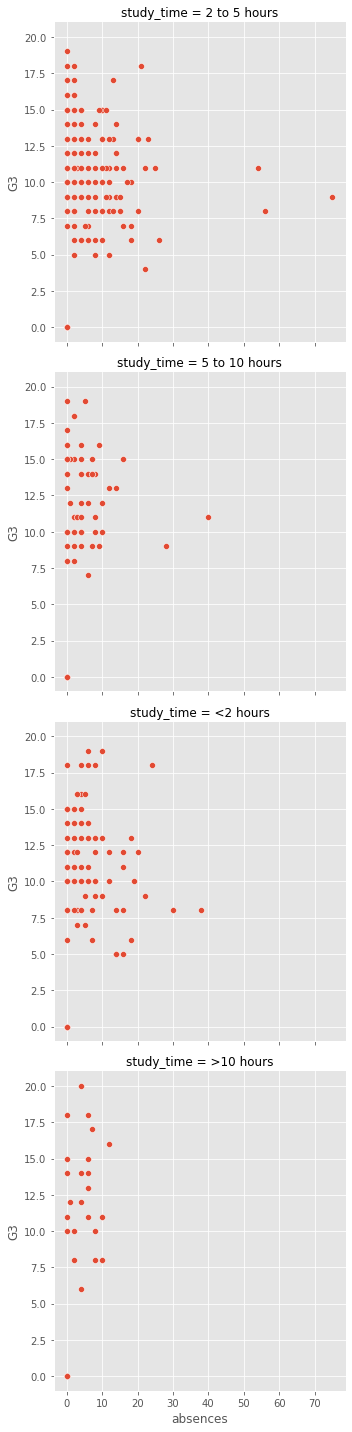

In [41]:
sns.relplot(x="absences", y="G3", 
                data=student ,kind= "scatter",
                row="study_time")

plt.show()

two factor subplot도 가능하다.  first semester grade ("G1")을 잘 맞으면 their final grade ("G3")가 높을까?  extra educational support from their school ("schoolsup") 이나 from their family ("famsup")가 성적에 영향이 있을까?

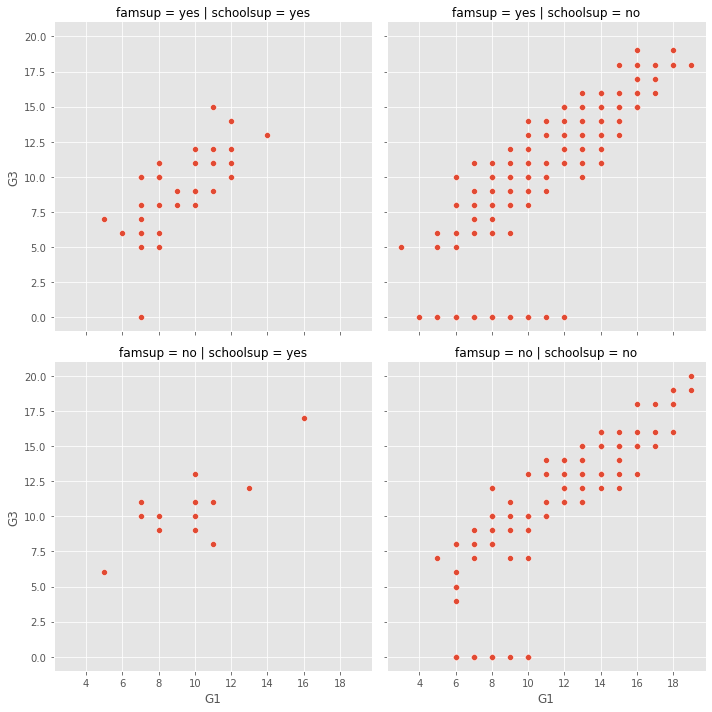

In [42]:
sns.relplot(x="G1", y="G3", 
            data=student,
            kind="scatter", 
            col="schoolsup",
            col_order=["yes", "no"],
            row="famsup",
            row_order=["yes","no"])

plt.show()

이번에 다루어볼 dataset은 `mpg`로 차에 대한 정보로 생산년도, 마력, 생산국, mpg에 대한 정보를 담고 있다. 마력과 fuel efficiency(mpg)에 대한 관계를 봐보도록 하자. 그리고 이 관계가 cylinders의 숫자에 따라 바뀌는지 말이다.  

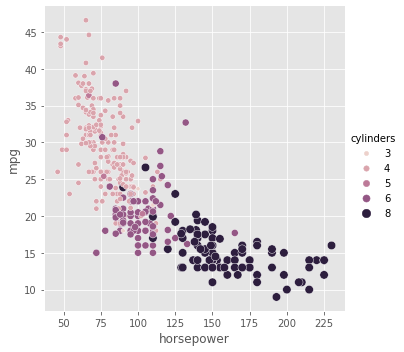

In [43]:
sns.relplot(x="horsepower", y="mpg", 
            data=mpg, kind="scatter", 
            size="cylinders",hue="cylinders")

plt.show()

("acceleration") 과 its fuel efficiency ("mpg")의 관계를 봐보도록 하자. 이들의 관계가 country of origin ("origin")에 따라 변하는지도 말이다.  

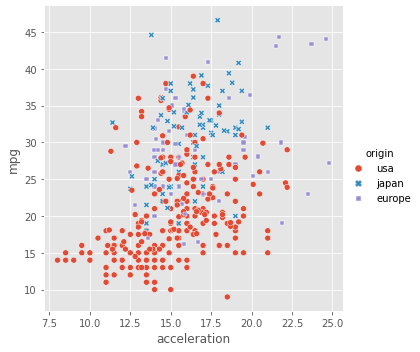

In [44]:
sns.relplot(x="acceleration",y="mpg",data=mpg, kind="scatter",
            hue="origin", style="origin")

plt.show()

이번에는 시간에 따라 mpg가 어케 변했는지 보자 시간의 흐름은 line plot으로 나타내면 좋다.  

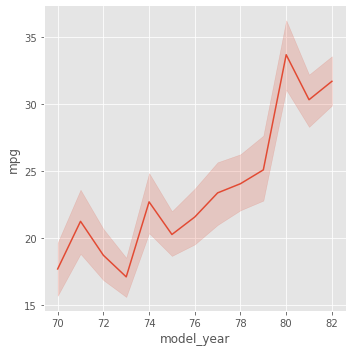

In [45]:
sns.relplot(x="model_year",y="mpg",data=mpg, kind="line")

plt.show()

위 그림은 confidence interval(신뢰구간)의 평균을 shaded area로 표현한 것이다. 이번에는 standard deviation 내에서 shaded area를 plot해보도록 하자. `ci = sd`를 추가해주면 된다.  

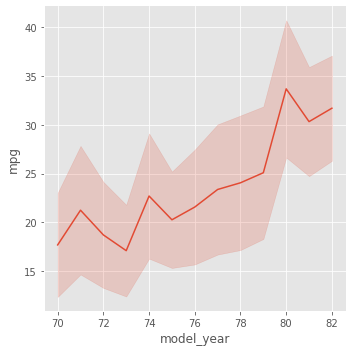

In [46]:
sns.relplot(x="model_year", y="mpg",
            data=mpg, kind="line",ci="sd")

plt.show()

이번에는 mpg 말고 마력이 바꿨는지 봐보자. shaded area를 없게 하려면 `ci=None`을 하면 된다.  

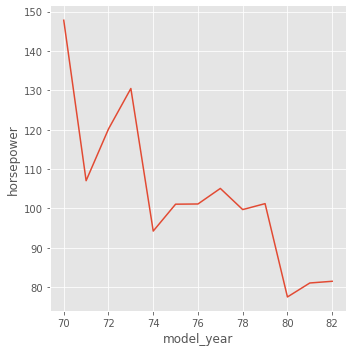

In [48]:
sns.relplot(x="model_year", y="horsepower",
            data=mpg,kind="line",ci=None)

plt.show()

`origin`에 따라 line style과 color를 다르게 해보자.  

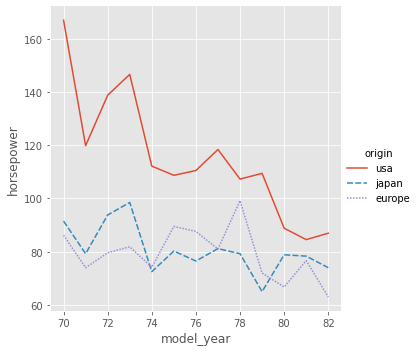

In [49]:
sns.relplot(x="model_year", y="horsepower", 
            data=mpg, kind="line", 
            ci=None,style='origin',hue='origin')

plt.show()

마커를 추가하고, 점선을 그냥 선으로 바꿀 수도 있다.  

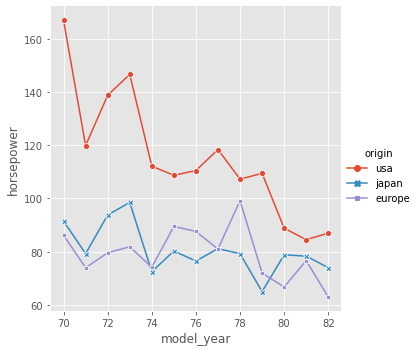

In [50]:
sns.relplot(x="model_year", y="horsepower", 
            data=mpg, kind="line", 
            ci=None, style="origin", 
            hue="origin",markers=True, dashes=False)

plt.show()